In [1]:
!pip install pandas
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#chat gpt was used to help with pre processing to learn more about ways to scale and make the data more malleable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=284807, step=1)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(284807, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# This was made after my visulizations but creates errors if not ran before
# I am using a subset to test the data for a start
df_subset = df.sample(frac=0.1, random_state=42)

# Splitting data
X = df_subset.drop('Class', axis=1)  # Features
y = df_subset['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train models
#I was going to use a confusion matrix but wanted my result to output differntly. 
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Gradient Boosting(chat gpt helped with this specific model)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Evaluate models printable resulsts based on classification report and accuracy

# Logistic Regression 
y_pred_logreg = logreg_model.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting
y_pred_gb = gb_model.predict(X_test_scaled)
print("\nGradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.33      0.33      0.33         6

    accuracy                           1.00      5697
   macro avg       0.67      0.67      0.67      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy: 0.9985957521502545

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.43      0.50      0.46         6

    accuracy                           1.00      5697
   macro avg       0.71      0.75      0.73      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy: 0.9987712831314727

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.40      0.33      0.36         6

    accuracy                           1.00

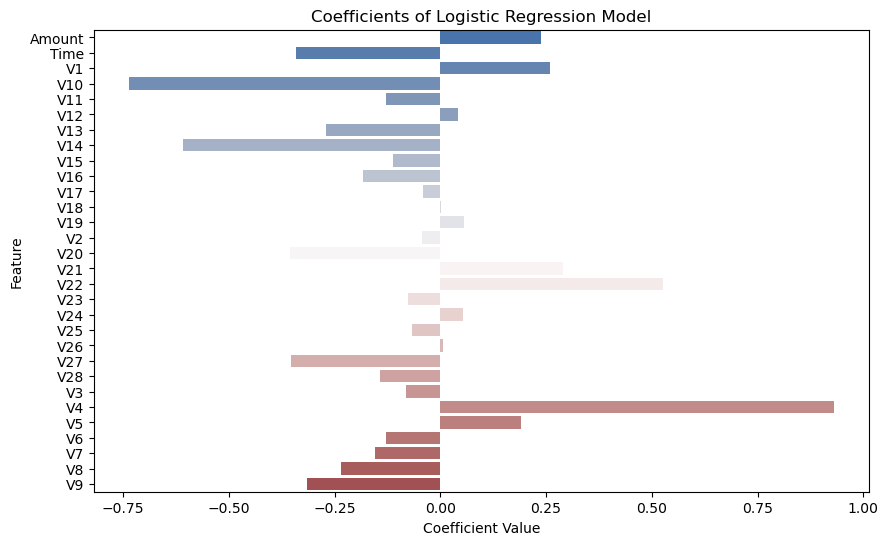

In [12]:
# I included this in code to help with ease of scrolling to troubleshoot faster
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Class'
features = df.columns.difference([target])

# Selecting features and the target variable
X = df[features]
y = df[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This code creates a pipeline using StandardScaler and Logistic Regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)

# This code helps to fit the model
pipeline.fit(X_train, y_train)

# Getting coefficients to use for logistic regression
logistic_regression_model = pipeline.named_steps['logisticregression']
coefficients = logistic_regression_model.coef_[0]

# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=X_train.columns, palette="vlag")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


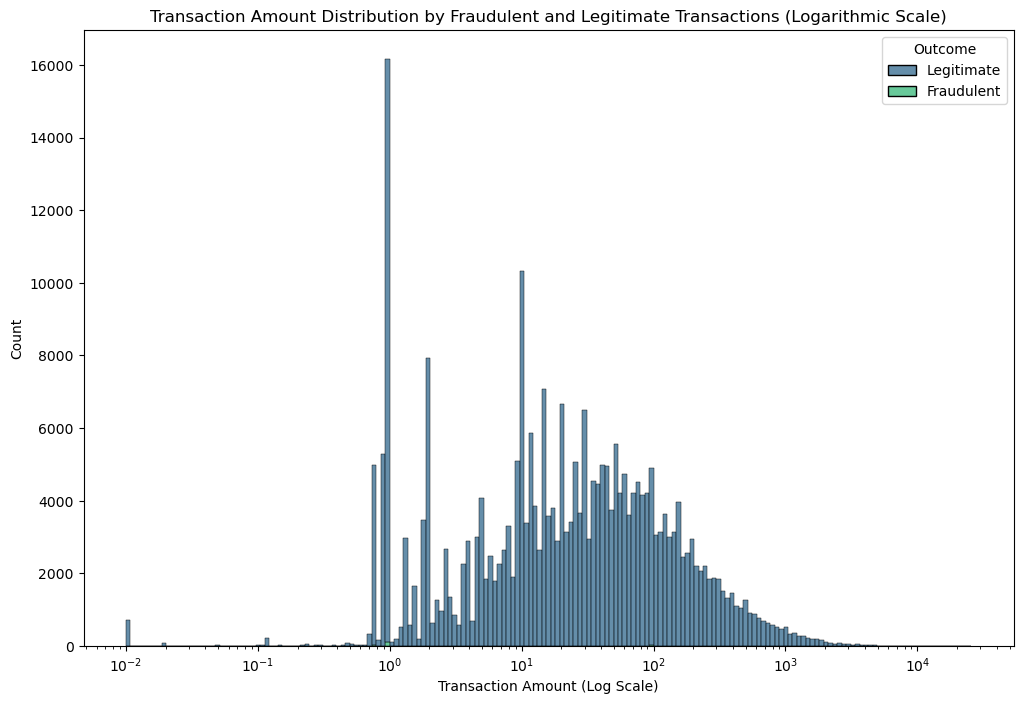

In [13]:
# This creates a new outcome column based on the class' (fraud or not)
df['Outcome'] = df['Class'].apply(lambda x: 'Fraudulent' if x == 1 else 'Legitimate')

# This checks and removes zero or negative values within the amount column
df = df[df['Amount'] > 0]

# This is a plot using a logrithmic scale for the x-axis (recommneded by google)
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Amount', hue='Outcome', multiple='stack', palette='viridis', log_scale=True)
plt.title('Transaction Amount Distribution by Fraudulent and Legitimate Transactions (Logarithmic Scale)')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Count')
plt.show()


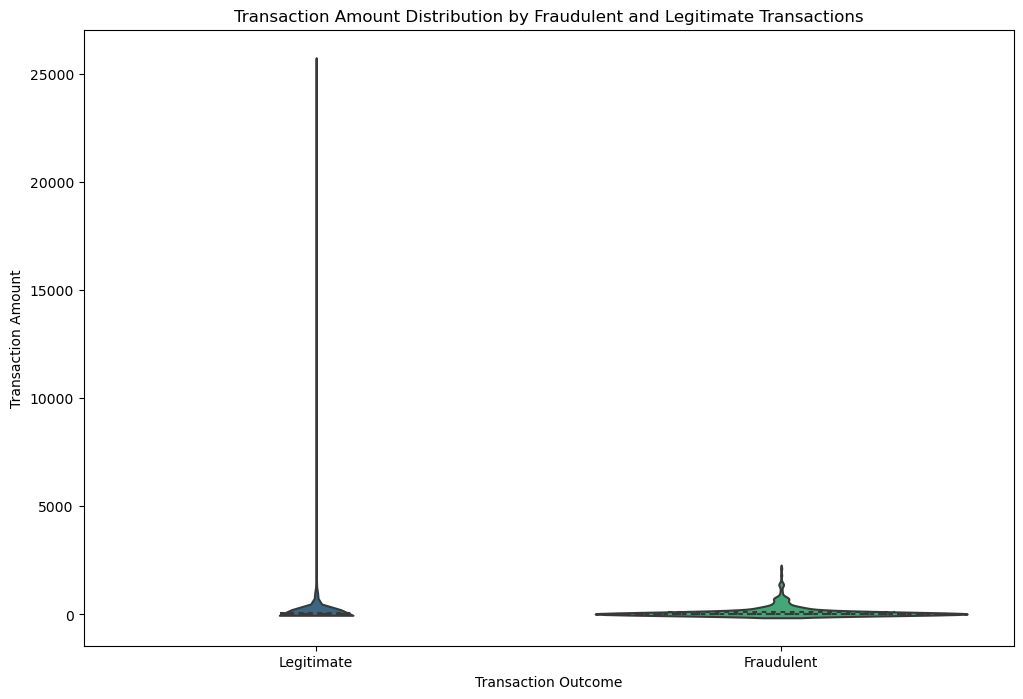

In [14]:
# Same thing, this creates a new outcome column based on class (fraud or not)
df.loc[:, 'Outcome'] = df['Class'].apply(lambda x: 'Fraudulent' if x == 1 else 'Legitimate')

# Same thing, this checks and removes zero or negative values within the amount column
df = df[df['Amount'] > 0]

# Plot for a violin plot to help show a different variation of data visualization
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Outcome', y='Amount', palette='viridis', inner='quartile')
plt.title('Transaction Amount Distribution by Fraudulent and Legitimate Transactions')
plt.xlabel('Transaction Outcome')
plt.ylabel('Transaction Amount')
plt.show()


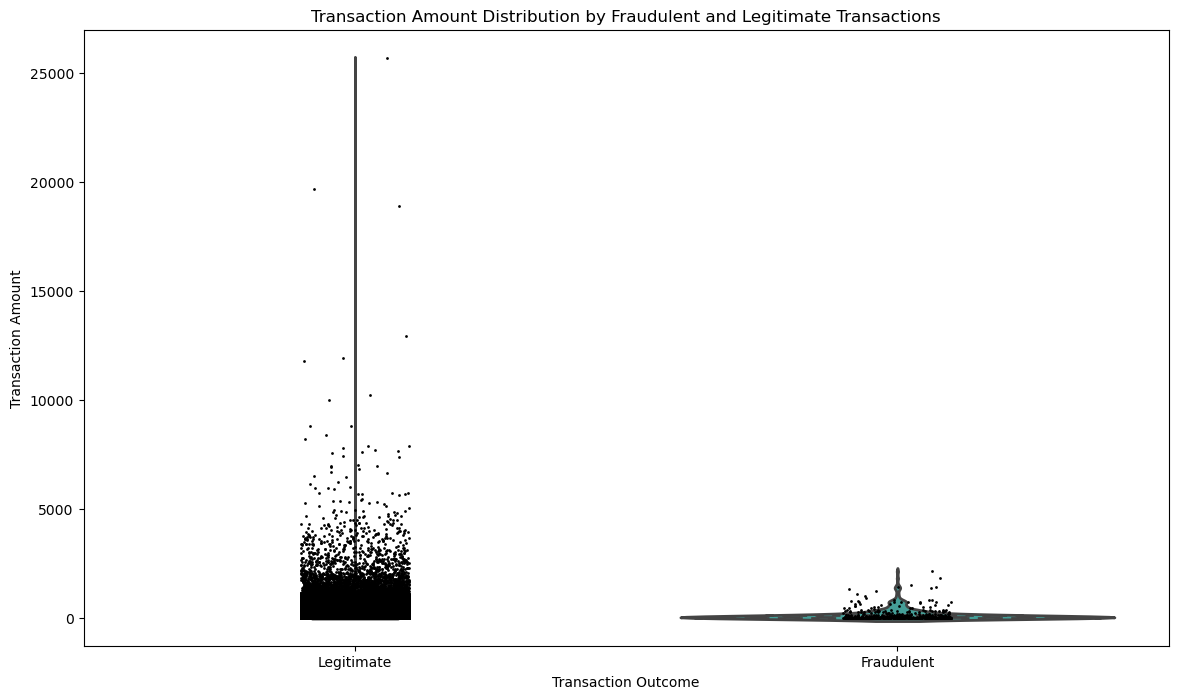

In [15]:
# Same thing, this creates a new outcome column based on class (fraud or not)
df['Outcome'] = df['Class'].apply(lambda x: 'Fraudulent' if x == 1 else 'Legitimate')

# Same thing, this checks and removes zero or negative values within the amount column
df = df[df['Amount'] > 0]

# Plot for a violin plot to help show a different variation of data visualization
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Outcome', y='Amount', palette='husl', inner='quartile', linewidth=2, width=0.8, alpha=0.7)
sns.stripplot(data=df, x='Outcome', y='Amount', color='black', jitter=True, size=2)
plt.title('Transaction Amount Distribution by Fraudulent and Legitimate Transactions')
plt.xlabel('Transaction Outcome')
plt.ylabel('Transaction Amount')
plt.show()


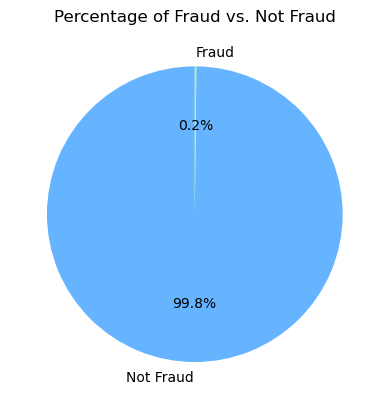

In [16]:
#pie chart
fraud_counts = df['Class'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['#66b3ff', '#99ff99']

plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Fraud vs. Not Fraud')
plt.show()